# Scratchpaper notebook

In [21]:
import os
import pandas as pd
import matplotlib. pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)  # Defuault: (6, 4)
plt.rcParams['figure.dpi'] = 300

out_dir = os.path.join("out", "rl")

In [22]:
papers_df = pd.read_csv(os.path.join("data", "review_176995_20220502220126.csv"))
papers_df.drop("Comments (enter 'N/A' if none)", axis=1, inplace=True)
papers_df.drop("Covidence #", axis=1, inplace=True)

In [23]:
rl_papers = papers_df[papers_df["Reinforcement learning"]]
rl_papers

,Study ID,Title,Reviewer Name,Title.1,Year of publication,Funding source,Supervised learning,Unsupervised learning,Reinforcement learning,Biological / physiological model,...,Definition requires initial fluid resuscitation,Definition requires high lactate,Internal validation,External retrospective validation (other hospitals),External retrospective validation (separate dataset),Prospective observational validation,Non-randomised interventional validation (clinical trial),Randomised interventional validation (clinical trial),Regulatory approval,Post-deployment surveillance
0,Yu 2019,Deep Inverse Reinforcement Learning for Sepsis...,Consensus,Deep Inverse Reinforcement Learning for Sepsis...,2019,Unclear or not reported,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,Jeter 2021,Learning to Treat Hypotensive Episodes in Seps...,Consensus,Learning to Treat Hypotensive Episodes in Seps...,2021,Academic,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,Zhu 2021,A self-supervised method for treatment recomme...,Consensus,A self-supervised method for treatment recomme...,2021,Academic,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
25,Speth 2021,Restricted sub-tree learning to estimate an op...,Consensus,Restricted sub-tree learning to estimate an op...,2021,Academic,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
27,Ma 2021,Individualized resuscitation strategy for sept...,Consensus,Individualized resuscitation strategy for sept...,2021,Academic,True,True,True,False,...,True,True,False,False,True,False,False,False,False,False
29,Jia 2021,Safety-driven design of machine learning for s...,Consensus,Safety-driven design of machine learning for s...,2021,Academic,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
32,Ahrendt 2021,Transatlantic transferability of a new reinfor...,Consensus,Transatlantic transferability of a new reinfor...,2020,Unclear or not reported,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
33,Zhang 2020,Individualized fluid administration for critic...,Consensus,Individualized fluid administration for critic...,2020,Academic,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
45,Peng 2018,Improving Sepsis Treatment Strategies by Combi...,Consensus,Improving Sepsis Treatment Strategies by Combi...,2018,Academic,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
47,Gordon 2018,The Artificial Intelligence Clinician learns o...,Consensus,The Artificial Intelligence Clinician learns o...,2018,Academic,False,True,True,False,...,NaN,NaN,True,False,True,False,False,False,False,False


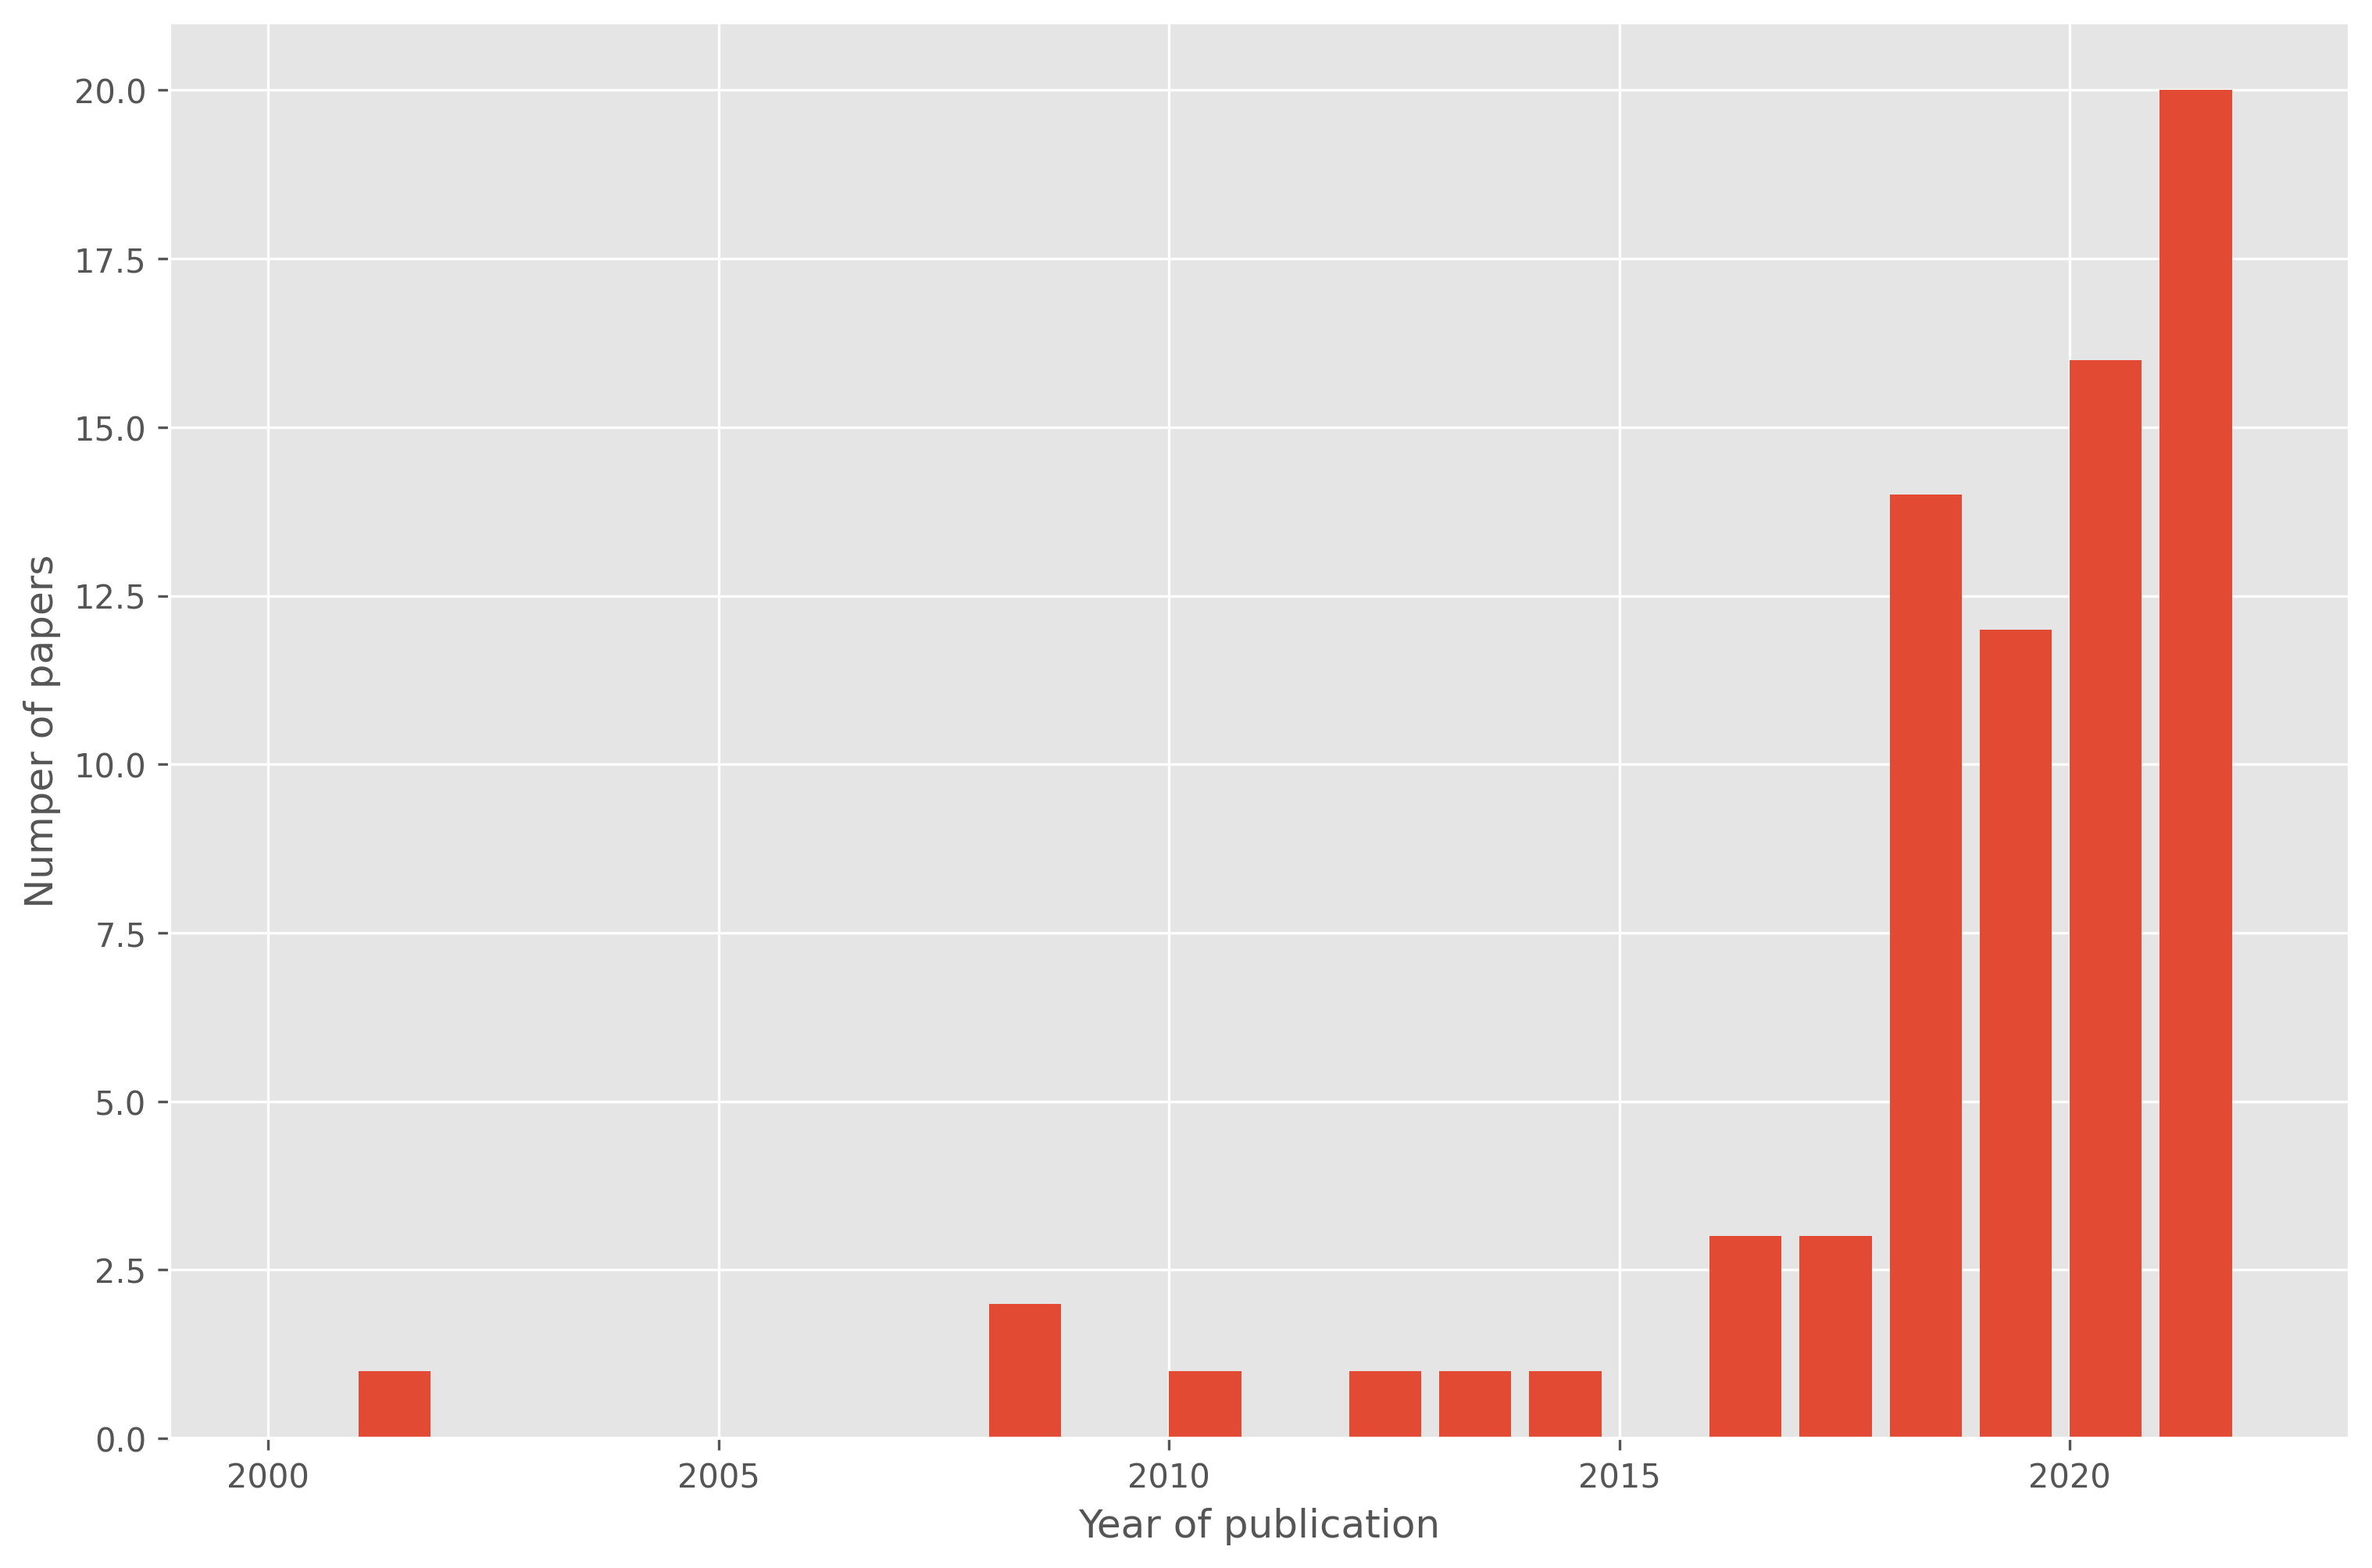

In [47]:
year_bins = list(range(2000, 2023, 1))
papers_df["Year of publication"].plot.hist(bins=year_bins, width=0.8)
plt.xlabel("Year of publication")
plt.ylabel("Numper of papers")
plt.savefig(os.path.join("out", "rl", f"Overall - papers VS time.png"))
plt.show()

In [13]:
n_papers = papers_df["Study ID"].count()
n_rl = rl_papers["Study ID"].count()
n_supervised = rl_papers[rl_papers["Supervised learning"]]["Study ID"].count()
print("Total papers:", n_papers)
print("Total RL papers:", n_rl)
print("Supervised & RL papers:", n_supervised)

Total papers: 74
Total RL papers: 26
Supervised & RL papers: 11


## Temporality

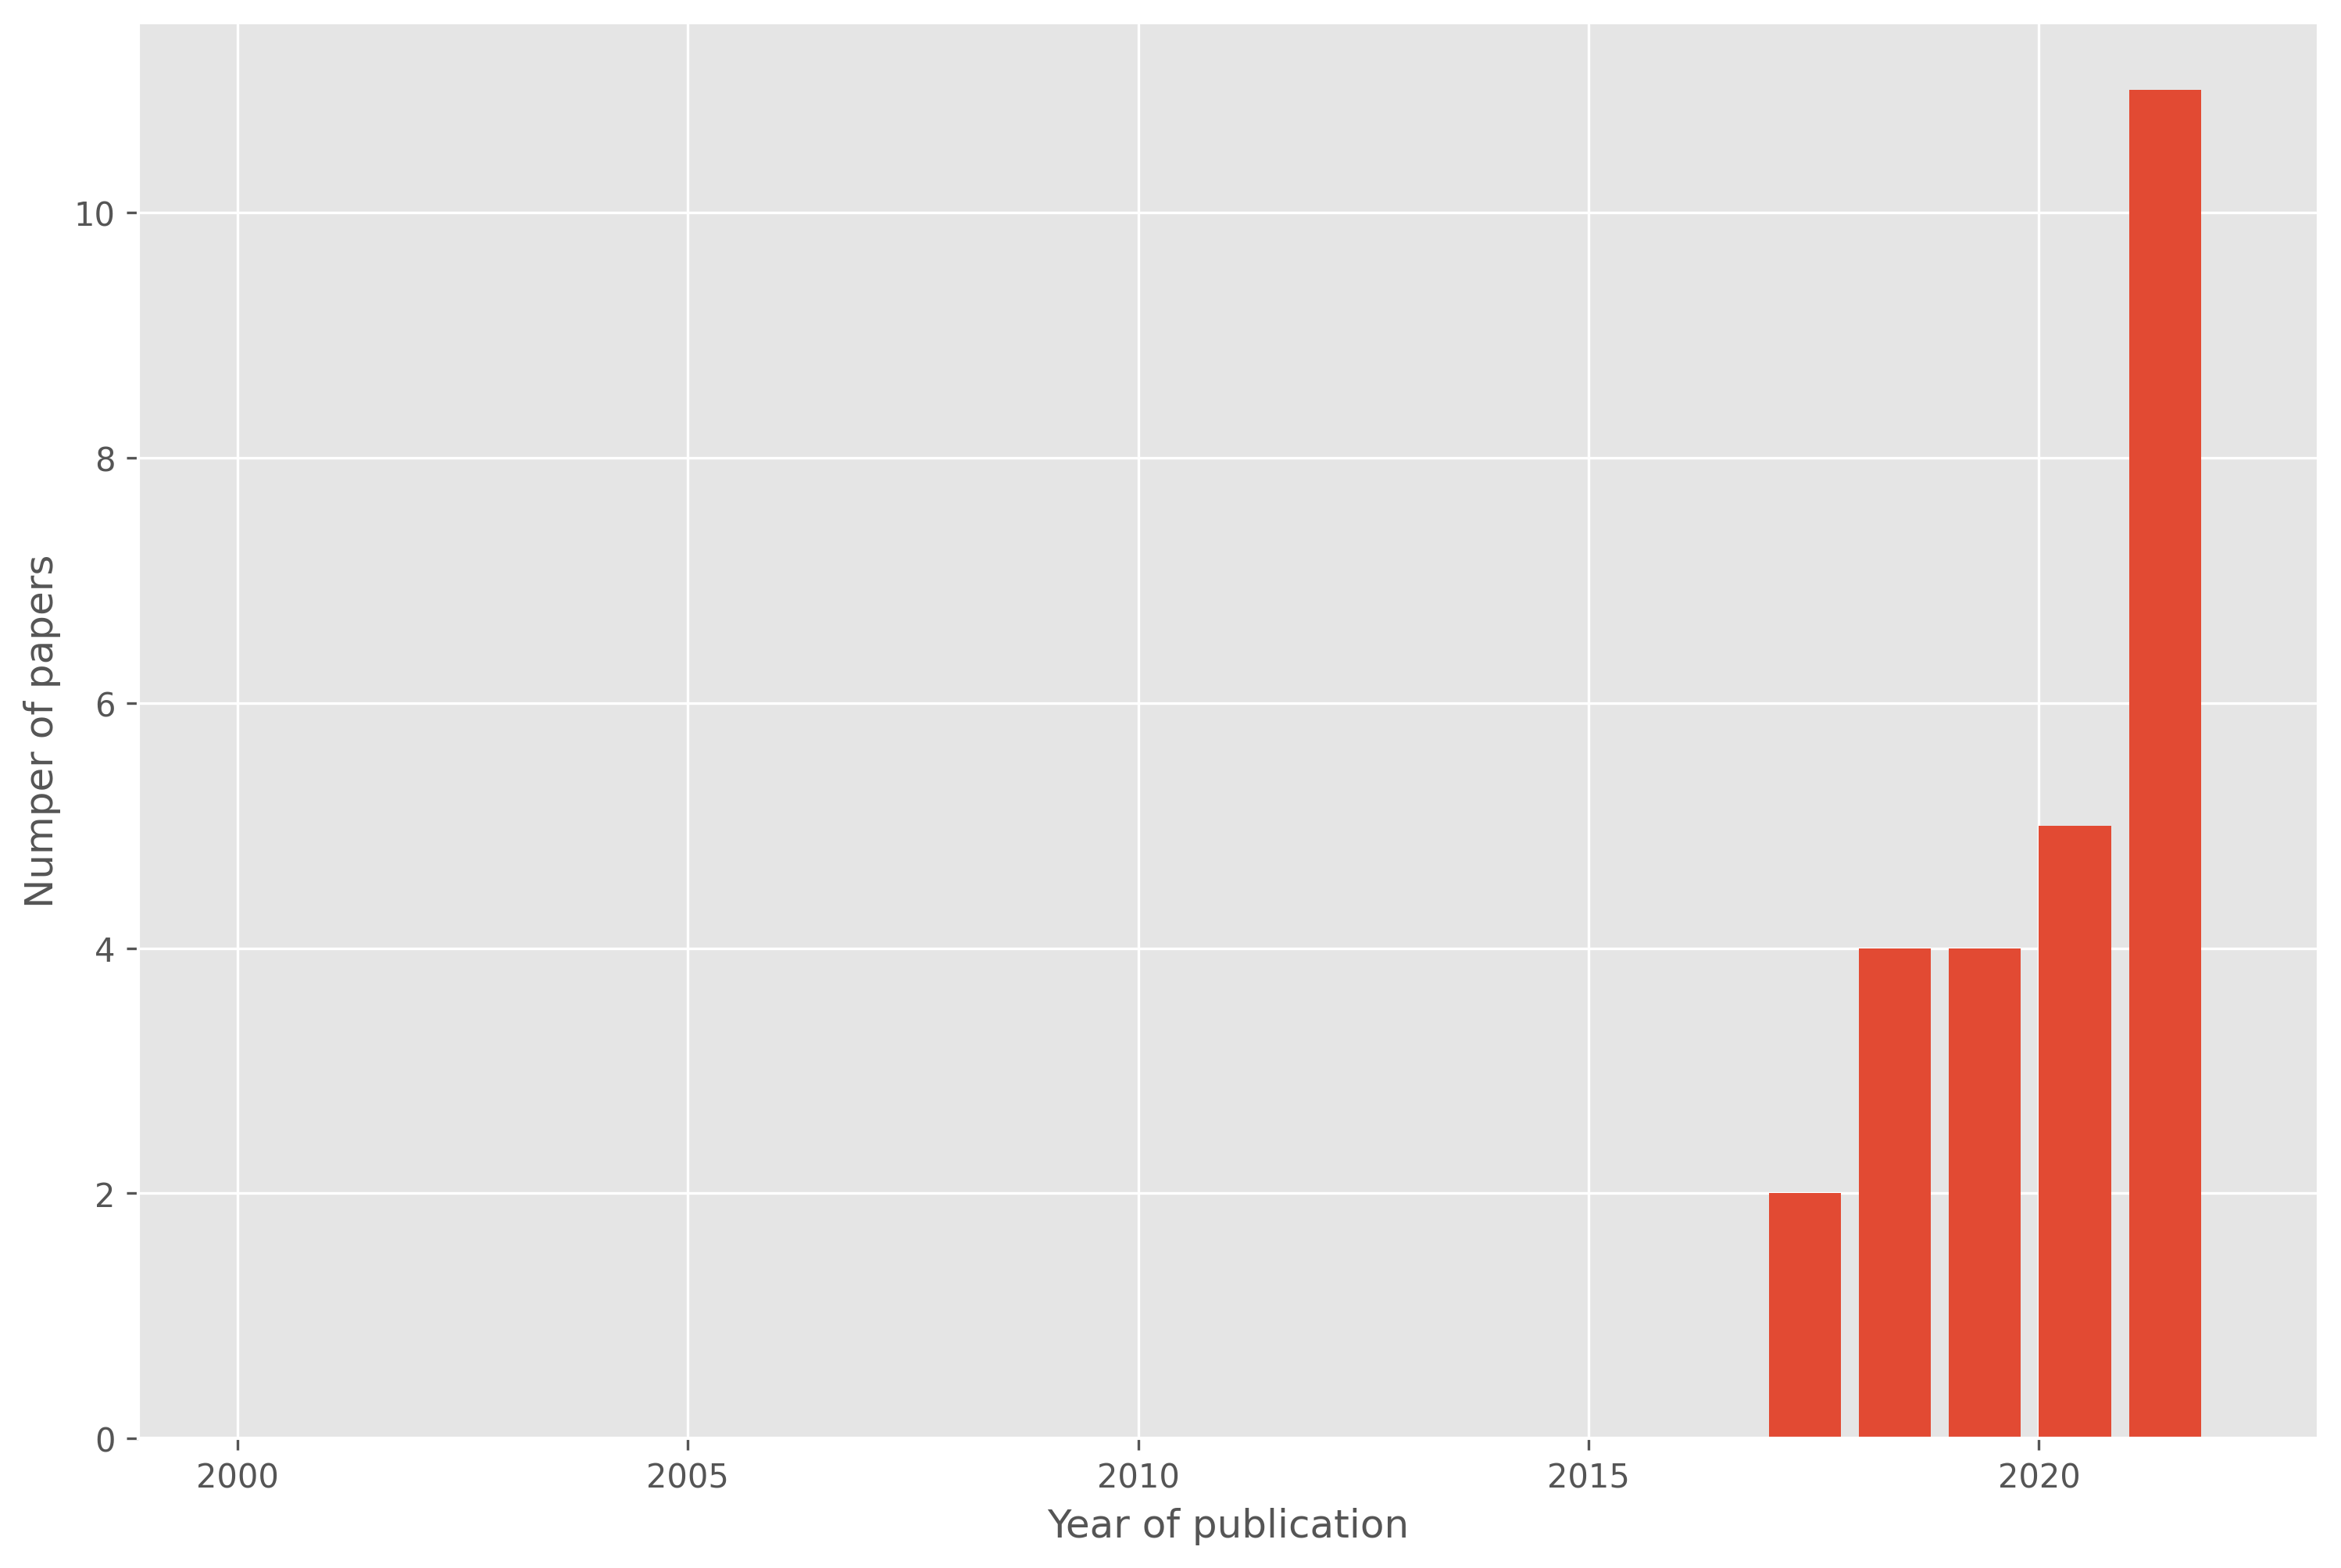

In [24]:
year_bins = list(range(2000, 2023, 1))
rl_papers["Year of publication"].plot.hist(bins=year_bins, width=0.8)
plt.xlabel("Year of publication")
plt.ylabel("Numper of papers")
plt.savefig(os.path.join(out_dir,f"Overall - papers VS time.png"))
plt.show()

In [30]:
rl_papers.sort_values("Year of publication")[["Title", "Year of publication"]]



,Title,Year of publication
73,Deep Reinforcement Learning for Sepsis Treatment,2017
72,Continuous State-Space Models for Optimal Seps...,2017
71,The Actor Search Tree Critic (ASTC) for Off-Po...,2018
69,Model-Based Reinforcement Learning for Sepsis ...,2018
47,The Artificial Intelligence Clinician learns o...,2018
45,Improving Sepsis Treatment Strategies by Combi...,2018
67,Truly Batch Apprenticeship Learning with Deep ...,2019
66,Optimizing Sequential Medical Treatments with ...,2019
65,Improving Sepsis Treatment Strategies by Combi...,2019
0,Deep Inverse Reinforcement Learning for Sepsis...,2019


In [15]:
rl_papers.groupby("Funding source")["Title"].count()

Funding source
Academic                   15
Mixed                       3
Unclear or not reported     8
Name: Title, dtype: int64

In [33]:
rl_papers.to_csv(os.path.join(out_dir, "rl_papers.csv"))